# Project Name : Credit Card Fraud Detection

In [2]:
#import the required libaries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In term of dataset we have selected creditcard dataset from kaggle.

In [3]:
df = pd.read_csv('D:/Project_Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Loading test data Test Data
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#get the info of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
#check if there is any null or missing values.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# It doesnt have any null value and doesnt need any normalisation,standarisation methods

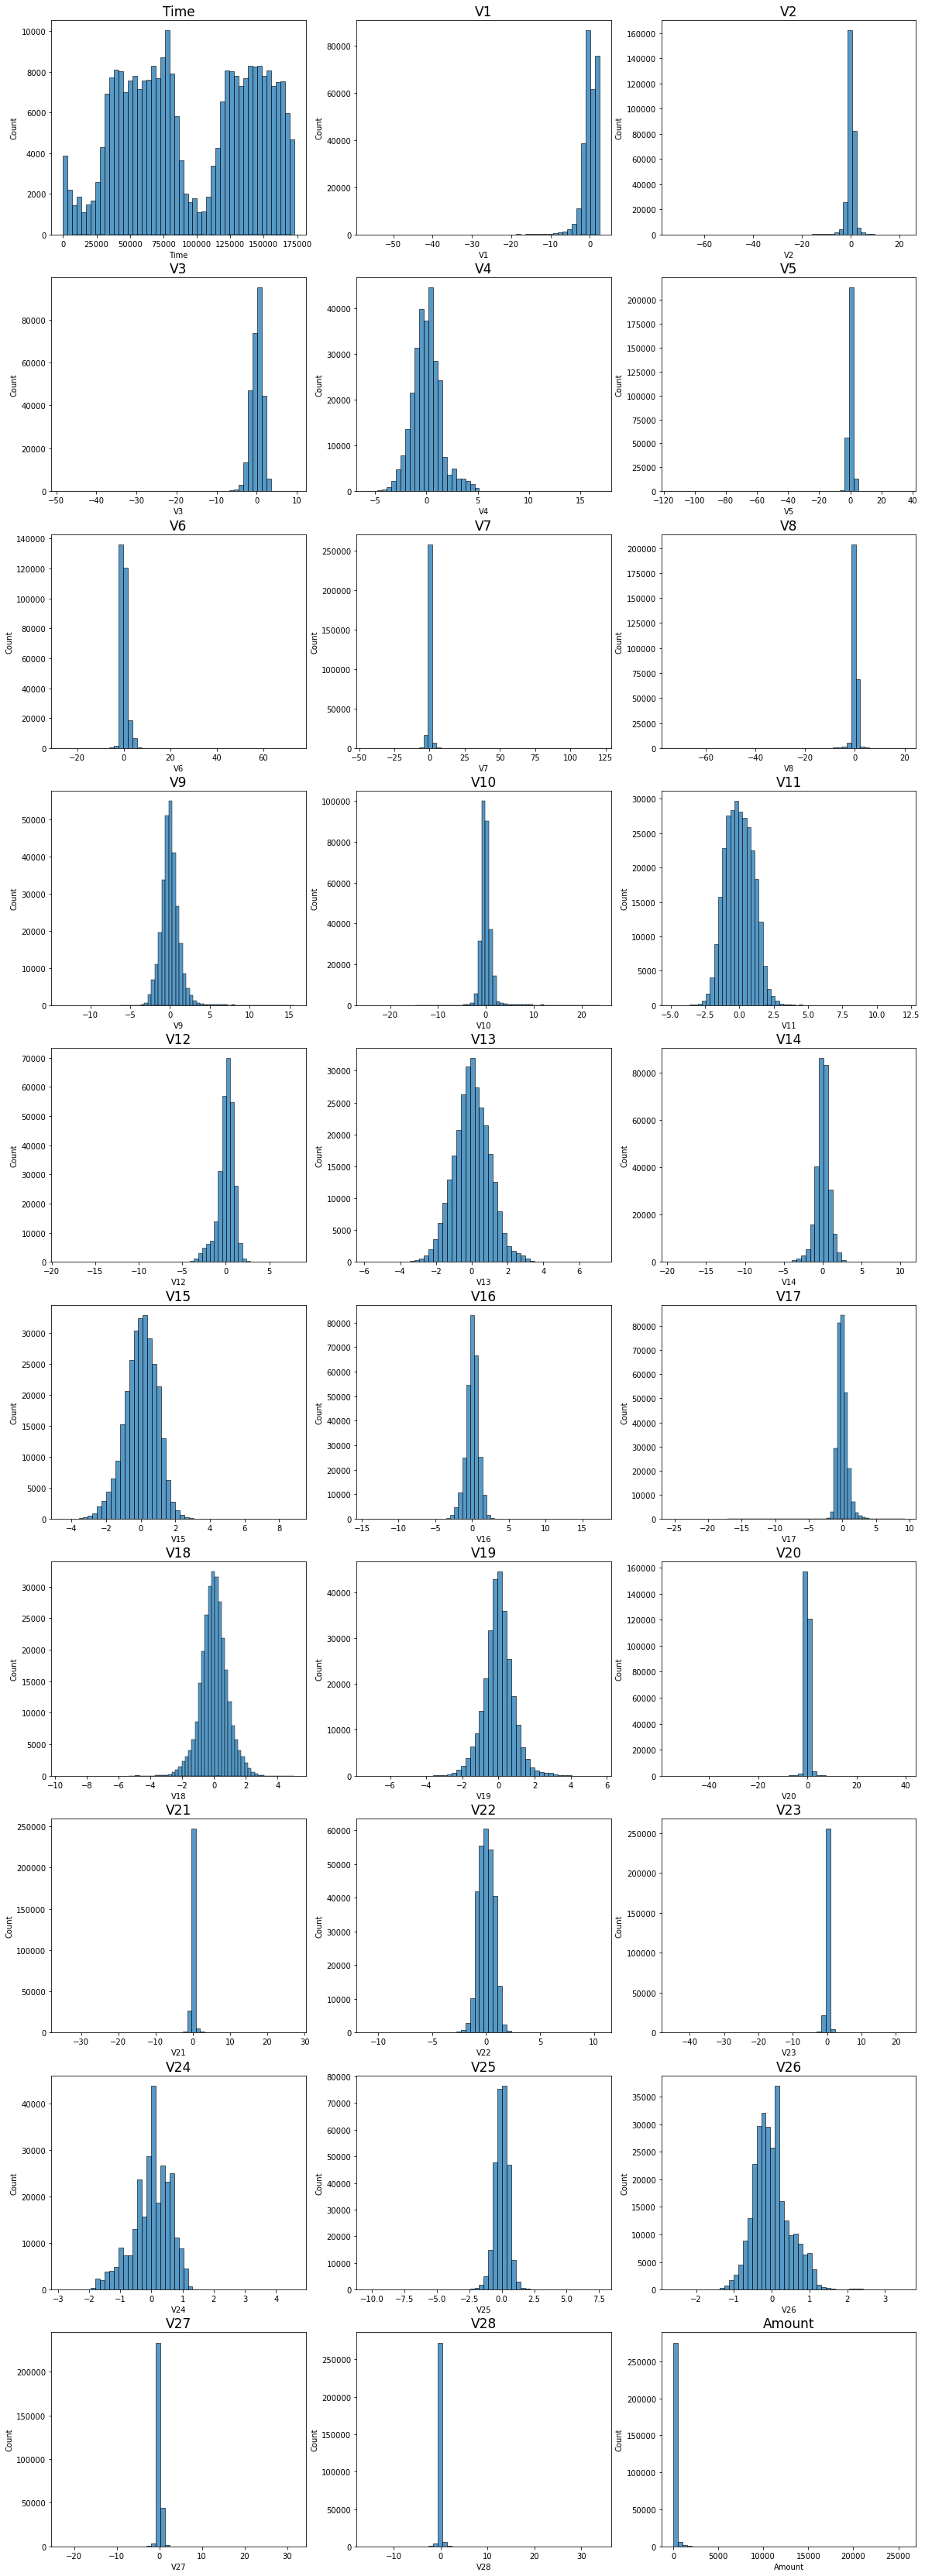

In [6]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col][df.Class == 1], bins=50)
    sns.histplot(df[col][df.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

In [7]:
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

Looks like there is clear relationship between amount and Class. Averge of amount is low for the fraudelant transactions. Lets Do further analysis to understand more

<AxesSubplot:>

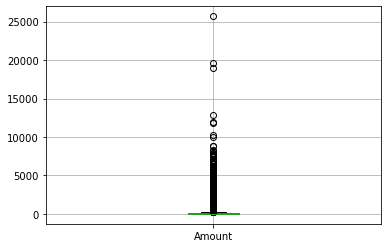

In [9]:
df.boxplot('Amount')

<AxesSubplot:xlabel='Amount', ylabel='Time'>

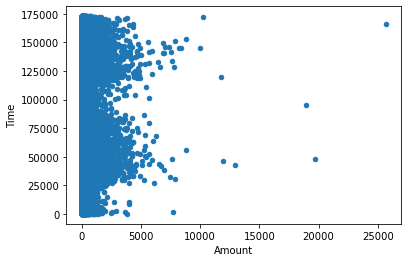

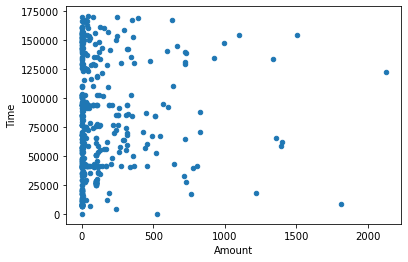

In [10]:
df[df.Class == 0].plot.scatter('Amount','Time')
df[df.Class == 1].plot.scatter('Amount','Time')

In [11]:
df[df.Amount > 10000].shape

(7, 31)

In [12]:
# There are 7 record in dataset the Ammount is greater than 10,000.00. 
# with scatterplot we can see all of these transactions are belongs to non-fraudelent as well
df = df.drop(df[df.Amount > 10000].index, axis=0)

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
x = df.drop('Class', axis=1)
y = df.Class.values

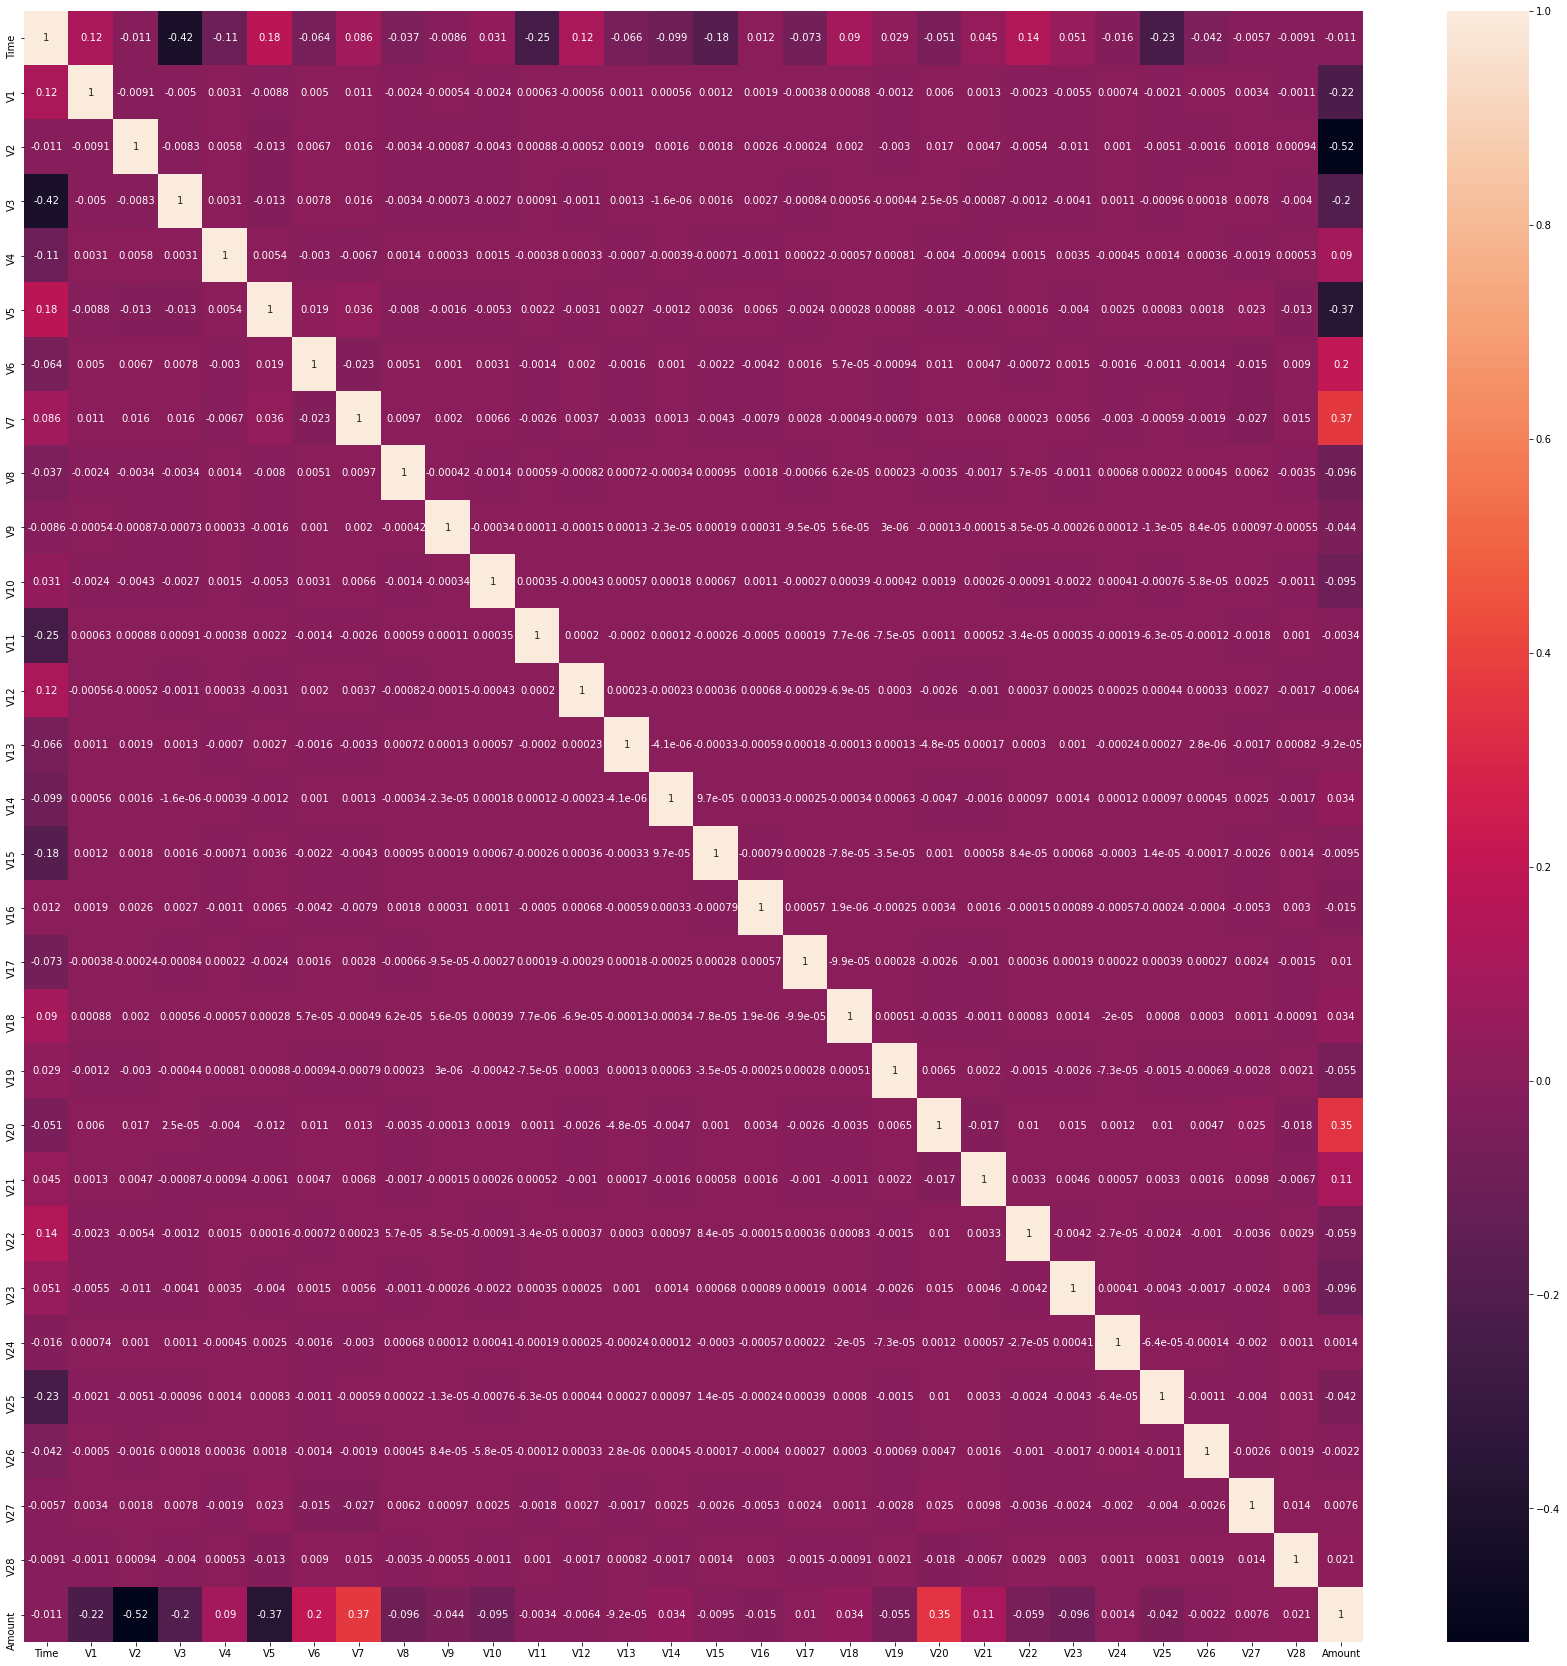

In [15]:
corr_matrix = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [16]:
# Handling Inbalance data.
counts = df.Class.value_counts()
print(counts)
print(f'legimate {(counts[0] / sum(counts))*100}% and Fraudent {(counts[1] / sum(counts))*100}%')

0    284308
1       492
Name: Class, dtype: int64
legimate 99.82724719101124% and Fraudent 0.17275280898876405%


Feature Importance

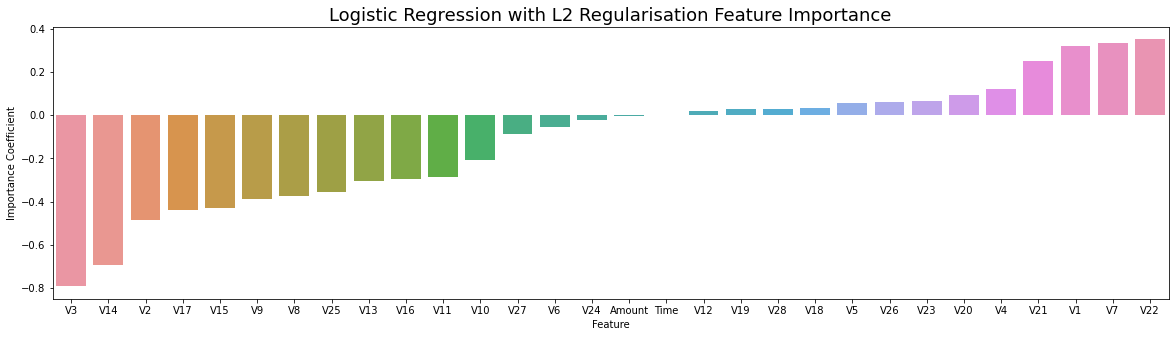

In [17]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(x,y)

# coefficient matrix
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

There are no sifnificant with ammount and time with class as expected. lets remove those columns

In [18]:
x.drop(['Time','Amount'], axis=1, inplace=True)

In [19]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
leg_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

no_of_samples = round(leg_df.shape[0] * 0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2,fraud_df],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

x,y = ros.fit_resample(x_sampled,y_sampled)

In [21]:
y.value_counts()

0    14215
1    14215
Name: Class, dtype: int64

In [22]:
#Split the dataset into train and test dataset.
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10661
 1    10661
 Name: Class, dtype: int64,
 0    3554
 1    3554
 Name: Class, dtype: int64)

# Defining Evaluation Criteria

In [23]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [24]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [25]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [26]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

# Logistic Regression

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.9445694991558807
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3554
           1       0.97      0.92      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.95      0.94      0.94      7108
weighted avg       0.95      0.94      0.94      7108



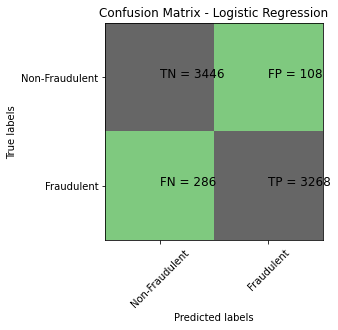

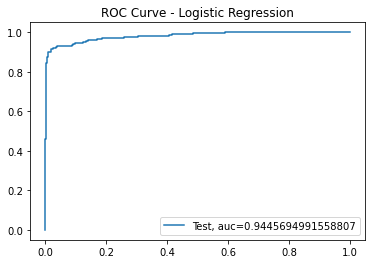

In [27]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(x_train,y_train)
pred1 = lr_model.predict(x_test)
prob1 = lr_model.predict_proba(x_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

# Bernoulli Naive Bayes Classifier

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.9006752954417557
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3554
           1       0.99      0.81      0.89      3554

    accuracy                           0.90      7108
   macro avg       0.91      0.90      0.90      7108
weighted avg       0.91      0.90      0.90      7108



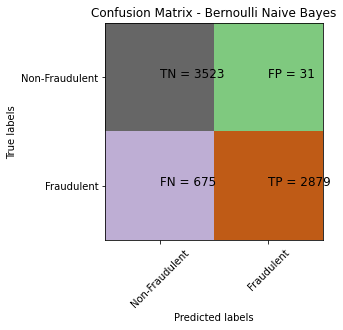

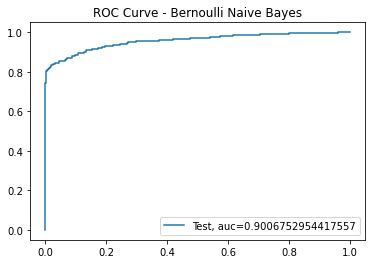

In [28]:
from sklearn.naive_bayes import BernoulliNB
gnb_model = BernoulliNB()
gnb_model.fit(x_train,y_train)
pred3 = gnb_model.predict(x_test)
prob3 = gnb_model.predict_proba(x_test)
print_results("Bernoulli Naive Bayes", y_test, pred3,prob3[:,-1])

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.9454136184580754
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3554
           1       0.97      0.92      0.94      3554

    accuracy                           0.95      7108
   macro avg       0.95      0.95      0.95      7108
weighted avg       0.95      0.95      0.95      7108



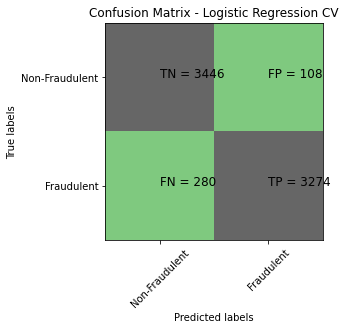

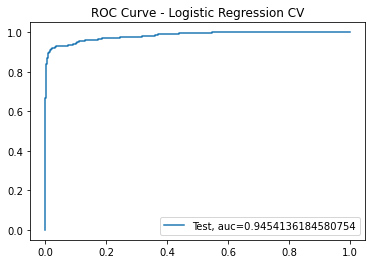

In [29]:
from sklearn.linear_model import LogisticRegressionCV

cv_num = KFold(n_splits=10, shuffle=True, random_state=12)
lr_modelCV = LogisticRegressionCV(max_iter=200,penalty='l2',scoring='roc_auc',cv=cv_num,tol=10,random_state=12)
lr_modelCV.fit(x_train,y_train)
pred2 = lr_modelCV.predict(x_test)
prob2 = lr_modelCV.predict_proba(x_test)
print_results("Logistic Regression CV", y_test, pred2,prob2[:,-1])

In [30]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.944569,0.968009,0.919527,0.943146
1,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
2,Logistic Regression CV,0.945414,0.968066,0.921216,0.944060


Random Forest Classifier + gini
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



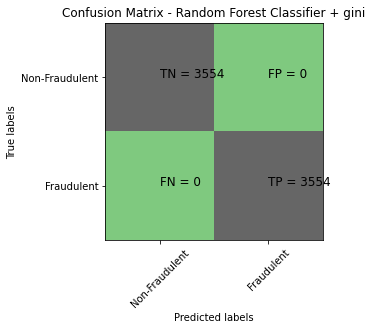

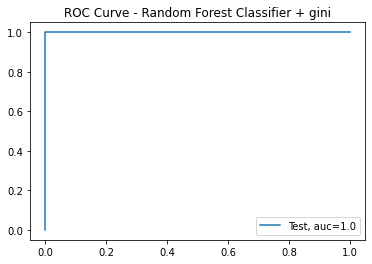

Random Forest Classifier + entropy 
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



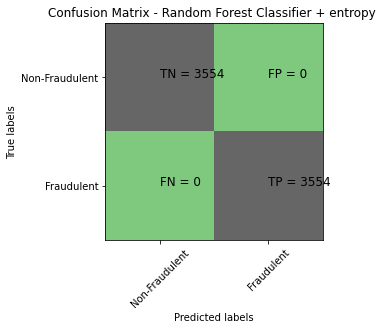

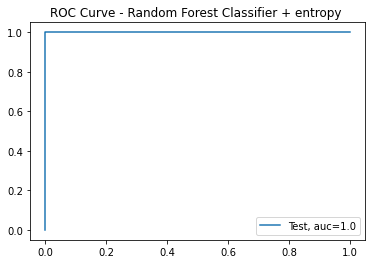

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(bootstrap = True,
                                max_features = 'sqrt', random_state=12)
rfc_model.fit(x_train,y_train)
pred5 = rfc_model.predict(x_test)
prob5 = rfc_model.predict_proba(x_test)
print_results("Random Forest Classifier + gini", y_test, pred5,prob5[:,-1])

rfc_model2 = RandomForestClassifier(bootstrap = True,criterion='entropy',max_features = 'sqrt', random_state=12)
rfc_model2.fit(x_train,y_train)
pred6 = rfc_model2.predict(x_test)
prob6 = rfc_model2.predict_proba(x_test)
print_results("Random Forest Classifier + entropy ", y_test, pred6,prob6[:,-1])

Ada Boost Classifier
--------------------------------------------------------------------------
accuracy score :0.996060776589758
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3554
           1       0.99      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



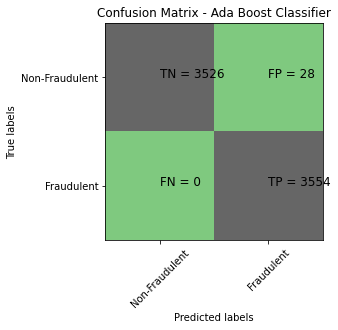

In [32]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(n_estimators=200, random_state=12)
adb_model.fit(x_train,y_train)
pred = adb_model.predict(x_test)
print_results("Ada Boost Classifier", y_test, pred)

In [33]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.944569,0.968009,0.919527,0.943146
1,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
2,Logistic Regression CV,0.945414,0.968066,0.921216,0.944060
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Ada Boost Classifier,0.996061,0.992183,1.000000,0.996076


Among the three models used AdaBoostClassifier gives the 99% accuracy which is the most among the all three algorithm we have used.

# Recommendation

We must try the various algorithm and choose the one that provides the highest accuracy.